Visualising Data
================

The purpose of scientific computation is insight not numbers: To understand the meaning of the (many) numbers we compute, we often need postprocessing, statistical analysis and graphical visualisation of our data. The following sections describe

-   Matplotlib/Pylab — which allows us to generate high quality graphs of the type *y* = *f*(*x*) (and a bit more)

-   Visual Python — which is a very handy tool to quickly generate animations of time dependent processes taking place in 3d space.



## What is matplotlib?

Matplotlib is the most popular and mature library for plotting data using
Python. It has all of the functionality you would expect, including the ability to control
the formatting of plots and figures at a very fine level.

The official matplotlib documentation is at http://matplotlib.org/  
The matplotlib gallery is at http://matplotlib.org/gallery.html

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### First Plot

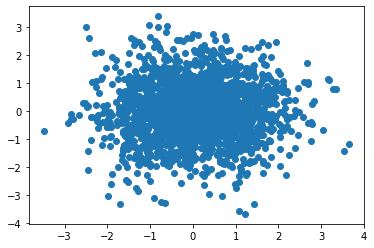

In [14]:
plt.plot(np.random.normal(size=2000), np.random.normal(size=2000), 'o')

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.


#### Plotting from an IPython notebook

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this book, we will generally opt for ``%matplotlib inline``:

In [15]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

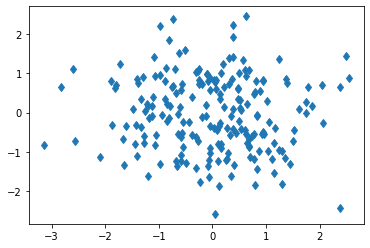

In [16]:
plt.plot(np.random.normal(size=200), np.random.normal(size=200), 'd')

## Plotting in Pandas

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

0    1.165750
1    1.636728
2    0.325143
3   -0.340783
4    0.019505
5    0.089806
6   -0.150922
7   -1.612476
8   -0.680207
9   -1.284765
dtype: float64


<AxesSubplot:>

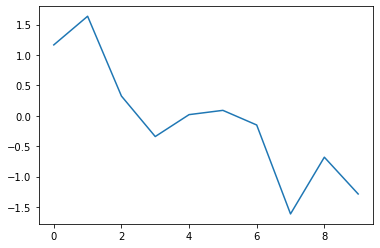

In [17]:
normals = pd.Series(np.random.normal(size=10))
print(normals)
normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

<AxesSubplot:>

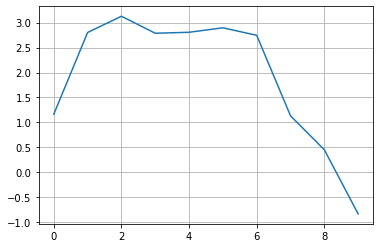

In [18]:
normals.cumsum().plot(grid=True)

Similarly, for a DataFrame:

     normal     gamma  poisson
0  1.116032  2.359693        2
1  1.020228  0.200395        1
2 -0.065419  1.984684        1
3 -1.274458  0.625291        0
4 -0.624857  0.074415        1
5 -1.144113  0.239778        0
6  1.492388  1.280589        2
7 -0.326492  0.617731        1
8  0.371969  0.360599        0
9  1.739119  1.724175        0


<AxesSubplot:>

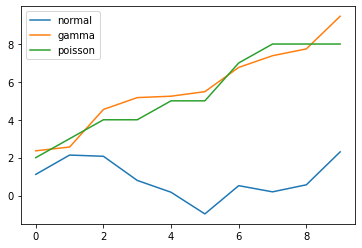

In [19]:
variables = pd.DataFrame({'normal': np.random.normal(size=10), 
                       'gamma': np.random.gamma(1, size=10), 
                       'poisson': np.random.poisson(size=10)})
print(variables)

variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with single argument per  `plot`:

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

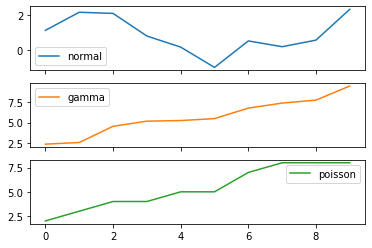

In [20]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

<AxesSubplot:>

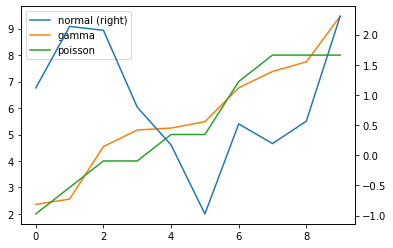

In [21]:
variables.cumsum(0).plot(secondary_y='normal')

If we would prefer slightly more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

Text(0, 0.5, 'cumulative sum')

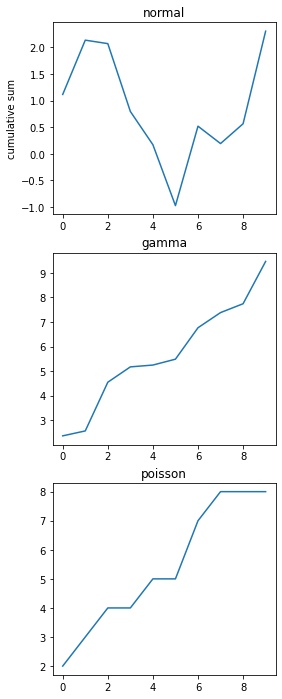

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 12))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

### Saving Figures to File

One pleasing feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [23]:
fig.savefig('figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [24]:
!ls -lh figure.png

'ls' is not recognized as an internal or external command,
operable program or batch file.


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

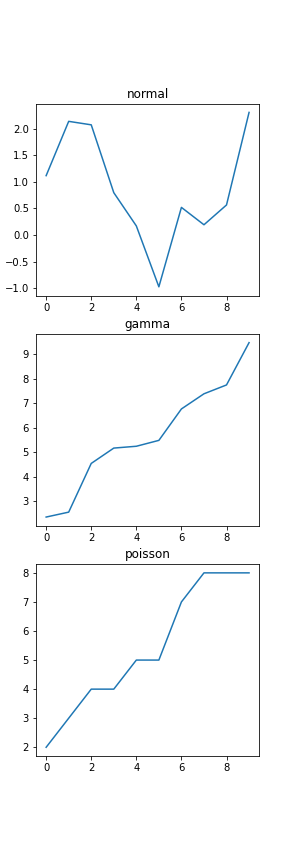

In [25]:
from IPython.display import Image
Image('figure.png')


In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what you have installed in the backend, various distinctive file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [26]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

#### Object-oriented interface

The object-oriented interface is available for these complicated situations, and whenever there is needa of slightly more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.

[ 0.          0.50505051  1.01010101  1.51515152  2.02020202  2.52525253
  3.03030303  3.53535354  4.04040404  4.54545455  5.05050505  5.55555556
  6.06060606  6.56565657  7.07070707  7.57575758  8.08080808  8.58585859
  9.09090909  9.5959596  10.1010101  10.60606061 11.11111111 11.61616162
 12.12121212 12.62626263 13.13131313 13.63636364 14.14141414 14.64646465
 15.15151515 15.65656566 16.16161616 16.66666667 17.17171717 17.67676768
 18.18181818 18.68686869 19.19191919 19.6969697  20.2020202  20.70707071
 21.21212121 21.71717172 22.22222222 22.72727273 23.23232323 23.73737374
 24.24242424 24.74747475 25.25252525 25.75757576 26.26262626 26.76767677
 27.27272727 27.77777778 28.28282828 28.78787879 29.29292929 29.7979798
 30.3030303  30.80808081 31.31313131 31.81818182 32.32323232 32.82828283
 33.33333333 33.83838384 34.34343434 34.84848485 35.35353535 35.85858586
 36.36363636 36.86868687 37.37373737 37.87878788 38.38383838 38.88888889
 39.39393939 39.8989899  40.4040404  40.90909091 41.

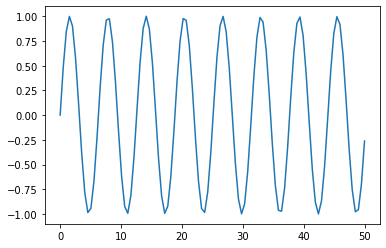

In [32]:
fig = plt.figure()
ax = plt.axes()

s = np.linspace(0, 50, 100)
print(s)
ax.plot(s, np.sin(s));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

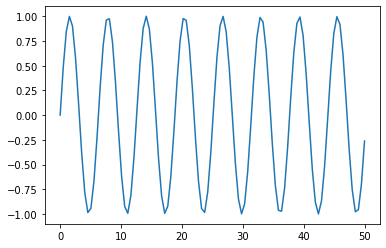

In [33]:
plt.plot(s, np.sin(s))

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

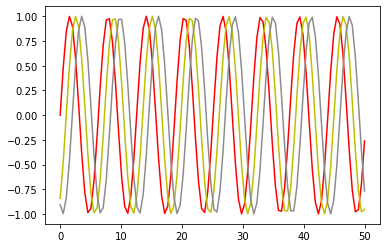

In [34]:
plt.plot(s, np.sin(s - 0), color='red')        
plt.plot(s, np.sin(s - 1), color='y')           
plt.plot(s, np.sin(s - 2), color='0.55')       

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

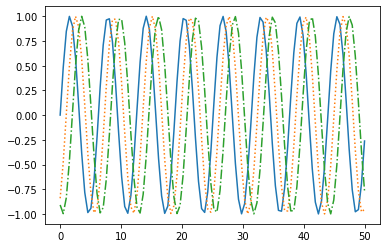

In [35]:
plt.plot(s, np.sin(s - 0), linestyle='-')        
plt.plot(s, np.sin(s - 1), linestyle=':')          
plt.plot(s, np.sin(s - 2), linestyle='-.')

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's advised to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

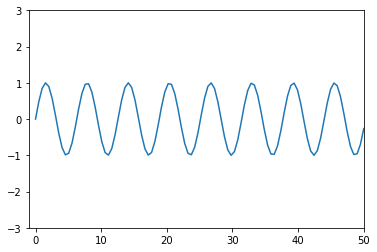

In [42]:
plt.plot(s, np.sin(s - 0))
plt.xlim(-1, 50)
plt.ylim(-3, 3);

For more information on axis limits and other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

## Labeling Plots

As the last piece of this section, we'll briefly look at the labelling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

Text(0, 0.5, 'cos(x)')

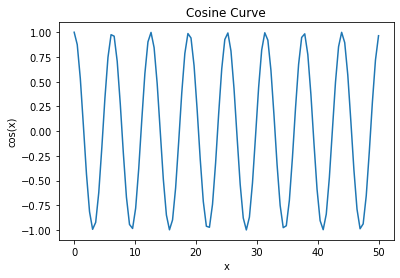

In [43]:
plt.plot(s, np.cos(s))
plt.title("Cosine Curve")
plt.xlabel("x")
plt.ylabel("cos(x)")

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions that we use:

In [44]:
plt.style.use('seaborn-whitegrid')

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

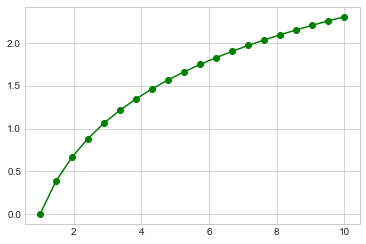

In [46]:
x = np.linspace(1, 10, 20)
y = np.log(x)

plt.plot(x, y, 'o-', color='green')

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

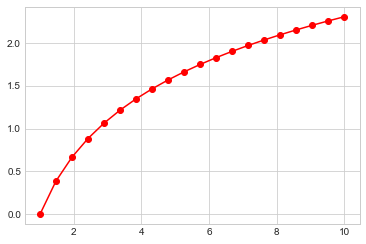

In [47]:
plt.plot(x, y, '-or');

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

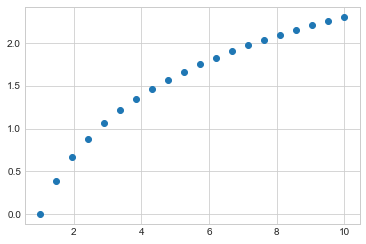

In [48]:
plt.scatter(x, y, marker='o')

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

C:\Users\Lahari\AppData\Local\Temp\ipykernel_16744\4123527754.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


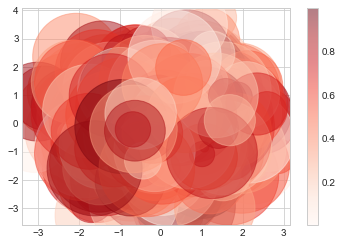

In [51]:
  # show color scale
    
rng = np.random.RandomState(7)
x = rng.randn(1000)
y = rng.randn(1000)
colors = rng.rand(1000)
sizes = 10000 * rng.rand(1000)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5,
            cmap='Reds')
plt.colorbar()

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
This way, the color and size of points can be used to convey information through visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

## ``plot`` Versus ``scatter``: A Note on Efficiency

Apart from the different features available in ``plt.plot`` and ``plt.scatter``, why one might you choose to use one over the other? While it doesn't matter much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

# Visualizing Errors

For any scientific measurement, accurate accounting of errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given in this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

## Errorbars

A basic errorbar can be created with a single Matplotlib function call:

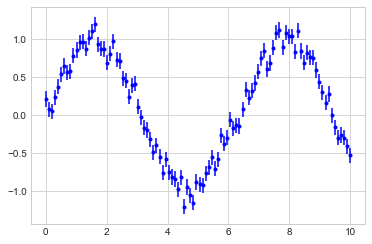

In [52]:
x = np.linspace(0, 10, 100)
dy = 0.1
y = np.sin(x) + dy * np.random.randn(100)

plt.errorbar(x, y, yerr=dy, fmt='.b');

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

## Histograms

A simple histogram can be a great first step in understanding a dataset.

In [68]:
plt.style.use('seaborn-white')

data = np.random.randn(1000)
print(data)

[-4.48011628e-01 -2.05200051e+00  7.73300450e-01  9.70357510e-01
 -7.16409965e-01 -1.72050871e+00 -1.51863742e+00 -7.24784140e-01
 -7.56967787e-01 -9.01545224e-01 -7.17318212e-01  1.25051010e+00
  9.86641166e-01  6.68375307e-01  1.55476177e+00  1.51314052e+00
 -1.43890302e+00 -2.06106809e-01 -9.82206516e-01 -9.50400673e-01
 -1.99137244e-01 -3.49261293e-01  4.14665127e-01  9.40658108e-01
  9.75629469e-01  6.17071137e-01 -9.97175234e-01  4.68990986e-01
  1.50057162e-02  1.71654912e-01 -1.49360460e+00 -1.16452974e+00
 -1.54990096e+00 -2.24321923e+00 -4.51882467e-01  9.81814162e-01
 -7.36309547e-01  7.19835971e-01 -1.59744068e+00  7.48733553e-01
  1.08562167e+00  2.62910763e+00 -7.67694520e-01  1.95029064e+00
  7.01678727e-01  7.54725012e-01  3.15508485e-01  2.02775498e-01
 -9.25759891e-01 -7.56719744e-01  1.51057366e+00  1.84501528e+00
 -1.63055357e-01 -5.95845333e-01 -2.02323588e+00 -1.64669800e+00
 -3.23137584e-01 -1.66282778e+00 -5.43409717e-01 -1.06781932e+00
 -1.43539350e-02 -6.41324

(array([ 16.,  46., 129., 195., 241., 214., 108.,  41.,   8.,   2.]),
 array([-2.84723274, -2.21077742, -1.57432211, -0.9378668 , -0.30141148,
         0.33504383,  0.97149914,  1.60795445,  2.24440977,  2.88086508,
         3.51732039]),
 <BarContainer object of 10 artists>)

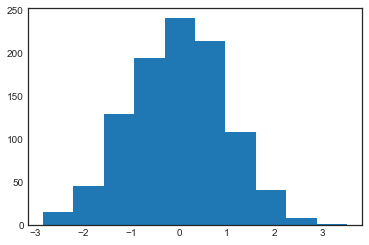

In [69]:
plt.hist(data)

The ``hist()`` function has many options to tune both the calculation and the display; 
Here's an example of a more customized histogram:

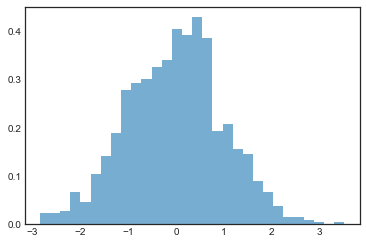

In [83]:
plt.hist(data, bins=30, density=True, alpha=0.6,
         histtype='stepfilled');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

(array([0.00845037, 0.00845037, 0.        , 0.        , 0.01690074,
        0.03380147, 0.01690074, 0.01690074, 0.06760295, 0.07605332,
        0.09295405, 0.1352059 , 0.07605332, 0.11830516, 0.21970958,
        0.20280885, 0.26196143, 0.21125922, 0.25351106, 0.35491548,
        0.36336585, 0.30421327, 0.32956438, 0.38871696, 0.44786954,
        0.35491548, 0.4309688 , 0.36336585, 0.31266364, 0.36336585,
        0.27886216, 0.27886216, 0.25351106, 0.31266364, 0.22815995,
        0.19435848, 0.21970958, 0.12675553, 0.18590811, 0.1352059 ,
        0.15210664, 0.02535111, 0.06760295, 0.05070221, 0.00845037,
        0.04225184, 0.03380147, 0.00845037, 0.00845037, 0.00845037]),
 array([-5.02325046, -4.90491243, -4.7865744 , -4.66823637, -4.54989833,
        -4.4315603 , -4.31322227, -4.19488423, -4.0765462 , -3.95820817,
        -3.83987013, -3.7215321 , -3.60319407, -3.48485604, -3.366518  ,
        -3.24817997, -3.12984194, -3.0115039 , -2.89316587, -2.77482784,
        -2.6564898 , -2.53

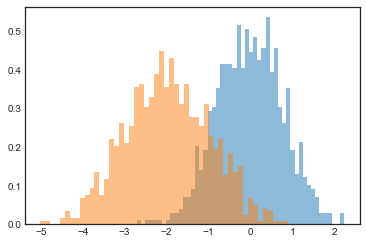

In [84]:
x = np.random.normal(0, 0.8, 1000)
y = np.random.normal(-2, 1, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=50)

plt.hist(x, **kwargs)
plt.hist(y, **kwargs)

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [85]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 62 324 455 149  10]


## Two-Dimensional Histograms

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [86]:
mean = [5, 2]
cov = [[3, 1], [2, 0.5]]
x, y = np.random.multivariate_normal(mean, cov, 10000)

C:\Users\Lahari\AppData\Local\Temp\ipykernel_16744\1115776733.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  x, y = np.random.multivariate_normal(mean, cov, 10000)


ValueError: too many values to unpack (expected 2)

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

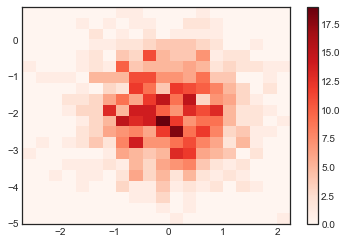

In [87]:
plt.hist2d(x, y, bins=20, cmap='Reds')
cb = plt.colorbar()

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

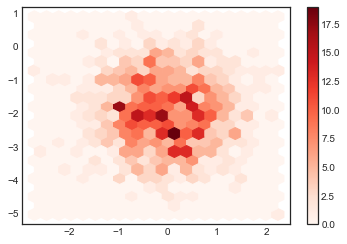

In [88]:
plt.hexbin(x, y, gridsize=20, cmap='Reds')

cb = plt.colorbar()

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).